<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/CatsAndDog_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-07-29 05:48:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   228MB/s    in 0.3s    

2022-07-29 05:48:04 (228 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

In [3]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

In [4]:
import os 

In [5]:
base_dir = '/content/cats_and_dogs_filtered'

In [6]:
print(os.listdir(base_dir))

['validation', 'vectorize.py', 'train']


In [7]:
print(os.listdir(f'{base_dir}/validation'))

['cats', 'dogs']


In [8]:
print(len(os.listdir(f'{base_dir}/train/cats')))

1000


In [9]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [10]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [11]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [12]:
train_cats_name = os.listdir(train_cats_dir)
train_dogs_name = os.listdir(train_dogs_dir)

In [13]:

print(train_cats_name[:10])
print(train_dogs_name[:10])

['cat.323.jpg', 'cat.39.jpg', 'cat.262.jpg', 'cat.706.jpg', 'cat.81.jpg', 'cat.591.jpg', 'cat.464.jpg', 'cat.131.jpg', 'cat.837.jpg', 'cat.516.jpg']
['dog.816.jpg', 'dog.464.jpg', 'dog.486.jpg', 'dog.772.jpg', 'dog.332.jpg', 'dog.465.jpg', 'dog.851.jpg', 'dog.350.jpg', 'dog.448.jpg', 'dog.616.jpg']


In [14]:
len(train_cats_name)

1000

In [15]:
len(train_dogs_name)

1000

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


Sample cats image:


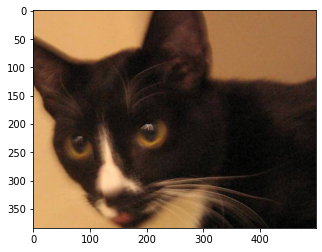


Sample dogs image:


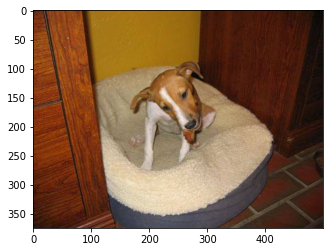

In [17]:
print("Sample cats image:")
plt.imshow(load_img(f"{os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])}"))
plt.show()

print("\nSample dogs image:")
plt.imshow(load_img(f"{os.path.join(train_dogs_dir, os.listdir(train_dogs_dir)[0])}"))
plt.show()

In [19]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

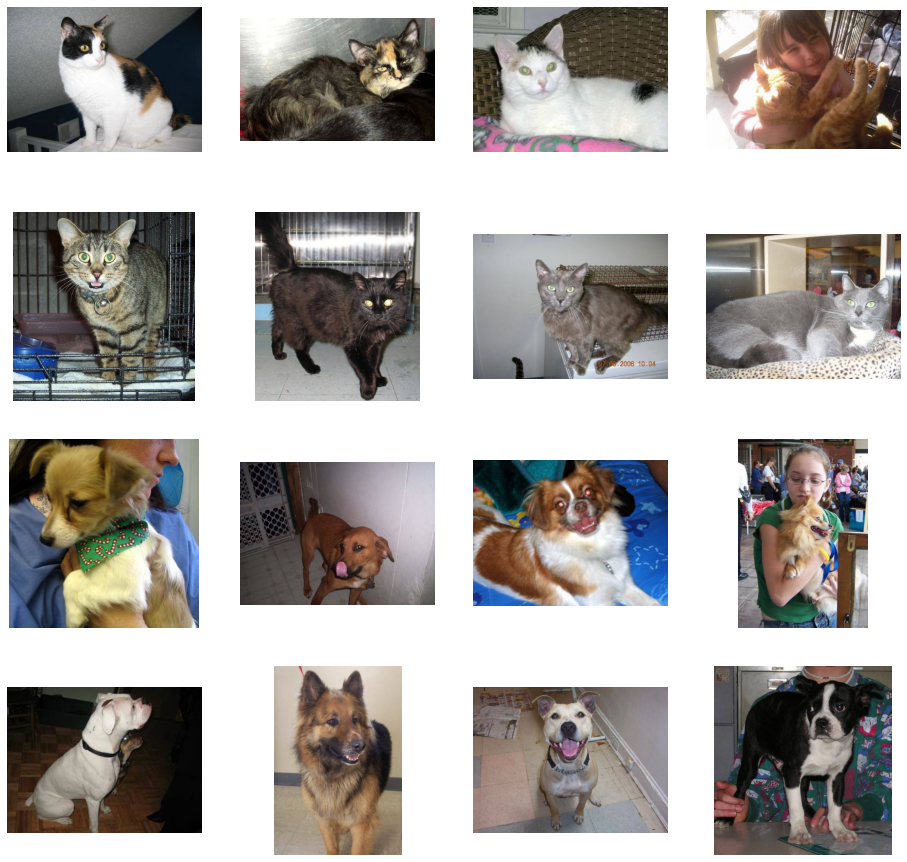

In [23]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_name[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_name[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [27]:
print(load_img(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])))

AttributeError: ignored

In [28]:
imgShape = img_to_array(load_img(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])))

In [30]:
imgShape.shape

(384, 499, 3)

In [31]:
imgShape = img_to_array(load_img(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[2])))

In [32]:
imgShape.shape

(500, 375, 3)

In [33]:
import tensorflow as tf


In [34]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [36]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)



In [40]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [41]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [42]:
history = model.fit(train_generator,epochs=20,validation_data= validation_generator,validation_steps=20,
                    verbose= 2)

Epoch 1/20
100/100 - 20s - loss: 0.7374 - accuracy: 0.5600 - val_loss: 0.6608 - val_accuracy: 0.6050 - 20s/epoch - 204ms/step
Epoch 2/20
100/100 - 7s - loss: 0.6343 - accuracy: 0.6615 - val_loss: 0.6532 - val_accuracy: 0.6075 - 7s/epoch - 67ms/step
Epoch 3/20
100/100 - 7s - loss: 0.5328 - accuracy: 0.7450 - val_loss: 0.6400 - val_accuracy: 0.6400 - 7s/epoch - 68ms/step
Epoch 4/20
100/100 - 7s - loss: 0.4511 - accuracy: 0.7900 - val_loss: 0.5774 - val_accuracy: 0.7075 - 7s/epoch - 69ms/step
Epoch 5/20
100/100 - 7s - loss: 0.3250 - accuracy: 0.8575 - val_loss: 0.7185 - val_accuracy: 0.6900 - 7s/epoch - 69ms/step
Epoch 6/20
100/100 - 7s - loss: 0.2435 - accuracy: 0.9020 - val_loss: 0.7365 - val_accuracy: 0.7375 - 7s/epoch - 69ms/step
Epoch 7/20
100/100 - 7s - loss: 0.1551 - accuracy: 0.9455 - val_loss: 0.9242 - val_accuracy: 0.7375 - 7s/epoch - 68ms/step
Epoch 8/20
100/100 - 7s - loss: 0.1166 - accuracy: 0.9545 - val_loss: 1.2188 - val_accuracy: 0.7225 - 7s/epoch - 69ms/step
Epoch 9/20
10

In [43]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 

Saving horse19-6.png to horse19-6.png
[1.0977004e-06]
horse19-6.png is a cat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


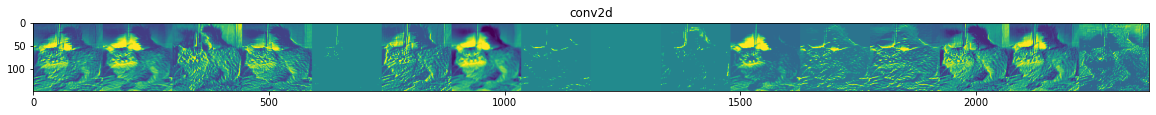

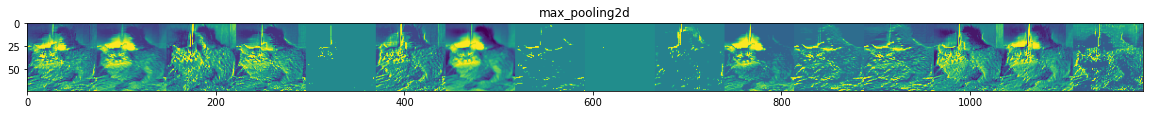

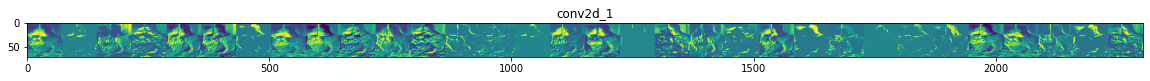

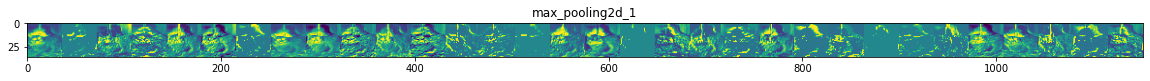

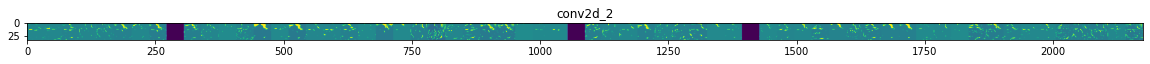

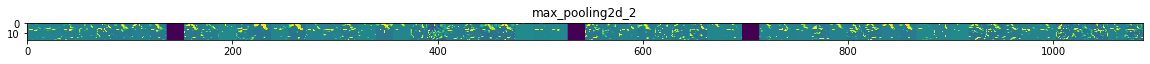

In [45]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_name]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_name]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

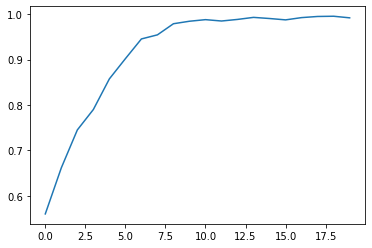

In [47]:
plt.plot(epochs,acc)


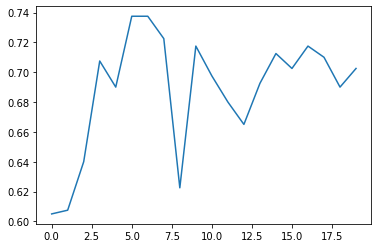

In [48]:
plt.plot(epochs,val_acc)


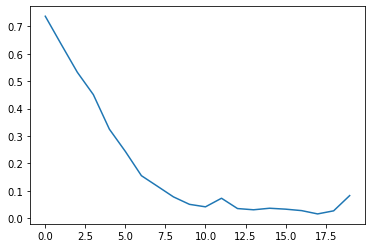

In [49]:
plt.plot(epochs,loss)

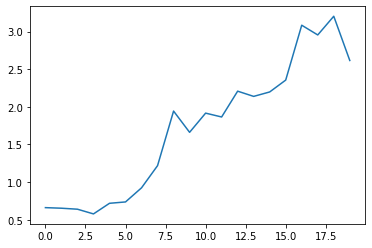

In [50]:
plt.plot(epochs,val_loss)

Text(0.5, 1.0, 'Training and validation loss')

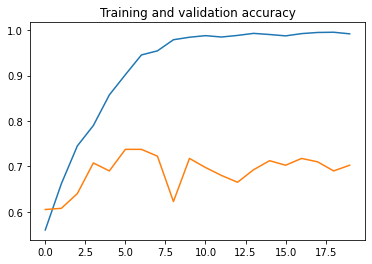

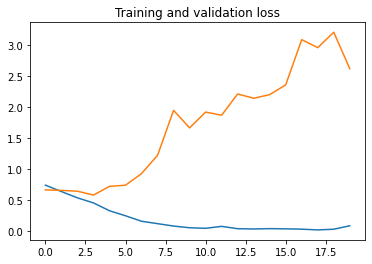

In [51]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )